In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
import sys 

In [3]:
#    Initialize the weights.
#    For each image, use these weights to predict whether it appears to be a 3 or a 7.
#    Based on these predictions, calculate how good the model is (its loss).
#    Calculate the gradient, which measures for each weight, how changing that weight would change the loss
#    Step (that is, change) all the weights based on that calculation.
#    Go back to the step 2, and repeat the process.
#    Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).


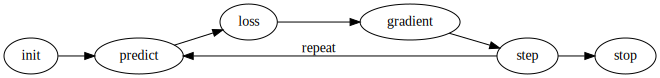

In [4]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [5]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

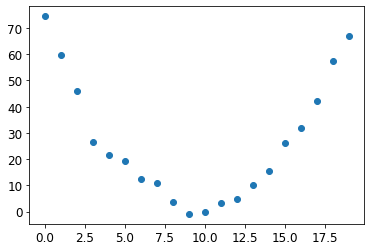

In [6]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [7]:
# speed of a roller coaster
# random quadratic function based on time variable
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [8]:
# Loss function mean squared error
# Lower values = better fit
def mse(preds, targets):
    return ((preds - targets)**2).mean()

In [9]:
#sevent step process to gradient descent approach
#1 : Initialize parameters and tell PyTorch we want to track gradients
params = torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [10]:
#2: calculate predictions
preds = f(time, params)

In [11]:
# helper function to see the predictions on a plot
def show_preds(preds, ax = None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

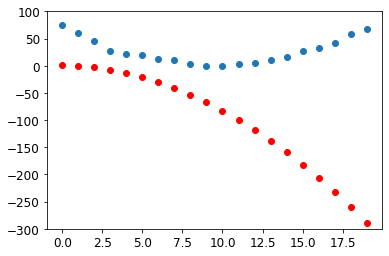

In [12]:
show_preds(preds)

In [13]:
#step 3 find loss
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [14]:
#Step 4 calculate gradient
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [15]:
# adjust params using a learning rate of 10^-5
params.grad *1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [16]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [17]:
#step 5 step the weights = update the parameters based on the gradients we calculated 
# along with the learning rate
#. data attribute in PyTorch to stop gradient calculation 
lr = 1e-5
params.data -= lr*params.grad.data
params.grad = None
params

tensor([-0.2339, -0.7164,  1.3551], requires_grad=True)

In [18]:
preds = f(time, params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

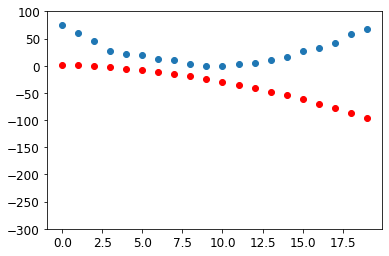

In [19]:
show_preds(preds)

In [20]:
# collect all the steps in a single function to apply repeatedly
def apply_step(params, lr = 1e-5, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr*params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return preds

In [21]:
# step 6: Apply process repeatedly
params = torch.randn(3).requires_grad_()
for i in range(10): 
    apply_step(params, lr=1e-3)

8631.7373046875
24472308.0
75376992256.0
232174573846528.0
7.151395425746944e+17
2.202758287755462e+21
6.784891749604339e+24
2.089869119894513e+28
6.437172630975622e+31
1.982765183504417e+35


In [22]:
params, preds

(tensor([1.4673e+17, 9.4167e+15, 6.4466e+14], requires_grad=True),
 tensor([  1.3551,   0.4048,  -1.0133,  -2.8991,  -5.2527,  -8.0740, -11.3631, -15.1200, -19.3446, -24.0370, -29.1972, -34.8251, -40.9207, -47.4842, -54.5153, -62.0143, -69.9810, -78.4155, -87.3177,
         -96.6877], grad_fn=<AddBackward0>))

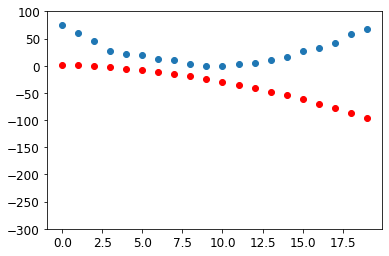

In [23]:
show_preds(preds)